# Supervised Learning and K Nearest Neighbors Exercises

![knn.png](Assets/knn.png)

# Learning Objectives:

- Explain supervised learning and how it can be applied to regression and classification problems
- Apply K-Nearest Neighbor (KNN) algorithm for classification
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware



# scikit-learn* 

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written. 

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed. 

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems. 

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code Prior to importing sklearn: 

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**

## This exercise relies on installation of  Intel® Extension for Scikit-learn*

If you have not already done so, follow the instructions from Week 1 for instructions





In [2]:
from __future__ import print_function
import os
data_path = ['../data']

from sklearnex import patch_sklearn
patch_sklearn()  # patch should be called PRIOR to importing Scikit-learn algorithms

from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
import pandas as pd

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


## Question 1

* Begin by importing the data. Examine the columns and data.
* Notice that the data contains a state, area code, and phone number. Do you think these are good features to use when building a machine learning model? Why or why not? 

We will not be using them, so they can be dropped from the data.

In [4]:
df = pd.read_csv('Orange_Telecom_Churn_Data.csv')

print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['state', 'account_length', 'area_code', 'phone_number', 'intl_plan',
       'voice_mail_plan', 'number_vmail_messages', 'total_day_minutes',
       'total_day_calls', 'total_day_charge', 'total_eve_minutes',
       'total_eve_calls', 'total_eve_charge', 'total_night_minutes',
       'total_night_calls', 'total_night_charge', 'total_intl_minutes',
       'total_intl_calls', 'total_intl_charge',
       'number_customer_service_calls', 'churned'],
      dtype='object')


In [5]:
print("\nFirst few rows of the dataset:")
print(df.head())


First few rows of the dataset:
  state  account_length  area_code phone_number intl_plan voice_mail_plan  \
0    KS             128        415     382-4657        no             yes   
1    OH             107        415     371-7191        no             yes   
2    NJ             137        415     358-1921        no              no   
3    OH              84        408     375-9999       yes              no   
4    OK              75        415     330-6626       yes              no   

   number_vmail_messages  total_day_minutes  total_day_calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total_day_charge  ...  total_eve_calls  total_eve_charge  \
0             45.07  ...               99             16.

In [6]:
columns_to_drop = ['state', 'area_code', 'phone_number']
df = df.drop(columns=columns_to_drop)

In [7]:
print("\nDataset after dropping 'state', 'area_code', and 'phone_number' columns:")
print(df.head())


Dataset after dropping 'state', 'area_code', and 'phone_number' columns:
   account_length intl_plan voice_mail_plan  number_vmail_messages  \
0             128        no             yes                     25   
1             107        no             yes                     26   
2             137        no              no                      0   
3              84       yes              no                      0   
4              75       yes              no                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge

## Question 2

* Notice that some of the columns are categorical data and some are floats. These features will need to be numerically encoded using one of the methods from the lecture.
* Finally, remember from the lecture that K-nearest neighbors requires scaled data. Scale the data using one of the scaling methods discussed in the lecture.

In [8]:
label_binarizer = LabelBinarizer()

categorical_columns = ['intl_plan', 'voice_mail_plan', 'churned']
for column in categorical_columns:
    df[column] = label_binarizer.fit_transform(df[column])

print("\nDataset after encoding categorical features:")
print(df.head())


Dataset after encoding categorical features:
   account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0             128          0                1                     25   
1             107          0                1                     26   
2             137          0                0                      0   
3              84          1                0                      0   
4              75          1                0                      0   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0              265.1              110             45.07              197.4   
1              161.6              123             27.47              195.5   
2              243.4              114             41.38              121.2   
3              299.4               71             50.90               61.9   
4              166.7              113             28.34              148.3   

   total_eve_calls  total_eve_charge  total_night_mi

In [9]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df.drop(columns=['churned']))

scaled_df = pd.DataFrame(scaled_features, columns=df.columns[:-1])  # Exclude the target variable
scaled_df['churned'] = df['churned']

print("\nDataset after scaling features:")
print(scaled_df.head())


Dataset after scaling features:
   account_length  intl_plan  voice_mail_plan  number_vmail_messages  \
0        0.524793        0.0              1.0               0.480769   
1        0.438017        0.0              1.0               0.500000   
2        0.561983        0.0              0.0               0.000000   
3        0.342975        1.0              0.0               0.000000   
4        0.305785        1.0              0.0               0.000000   

   total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  \
0           0.754196         0.666667          0.754183           0.542755   
1           0.459744         0.745455          0.459672           0.537531   
2           0.692461         0.690909          0.692436           0.333242   
3           0.851778         0.430303          0.851740           0.170195   
4           0.474253         0.684848          0.474230           0.407754   

   total_eve_calls  total_eve_charge  total_night_minutes  total_

## Question 3

* Separate the feature columns (everything except `churned`) from the label (`churned`). This will create two tables.
* Fit a K-nearest neighbors model with a value of `k=3` to this data and predict the outcome on the same data.

In [10]:
X = scaled_df.drop(columns=['churned'])
y = scaled_df['churned']

In [11]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X, y)

y_pred = knn_model.predict(X)

predicted_df = pd.DataFrame({'Actual Churned': y, 'Predicted Churned': y_pred})
print("\nPredicted outcomes on the same data:")
print(predicted_df.head())


Predicted outcomes on the same data:
   Actual Churned  Predicted Churned
0               0                  0
1               0                  0
2               0                  0
3               0                  0
4               0                  0


## Question 4

Ways to measure error haven't been discussed in class yet, but accuracy is an easy one to understand--it is simply the percent of labels that were correctly predicted (either true or false). 

* Write a function to calculate accuracy using the actual and predicted labels.
* Using the function, calculate the accuracy of this K-nearest neighbors model on the data.

In [12]:
def calculate_accuracy(actual, predicted):
    """
    Calculate accuracy given the actual and predicted labels.
    
    Parameters:
    - actual: Actual labels
    - predicted: Predicted labels
    
    Returns:
    - accuracy: Accuracy score
    """
    correct_predictions = np.sum(actual == predicted)
    total_predictions = len(actual)
    accuracy = correct_predictions / total_predictions
    return accuracy

In [13]:
accuracy = calculate_accuracy(y, y_pred)

print(f"\nAccuracy of the K-nearest neighbors model: {accuracy:.2%}")


Accuracy of the K-nearest neighbors model: 94.22%


## Question 5

* Fit the K-nearest neighbors model again with `n_neighbors=3` but this time use distance for the weights. Calculate the accuracy using the function you created above. 
* Fit another K-nearest neighbors model. This time use uniform weights but set the power parameter for the Minkowski distance metric to be 1 (`p=1`) i.e. Manhattan Distance.

When weighted distances are used for part 1 of this question, a value of 1.0 should be returned for the accuracy. Why do you think this is? *Hint:* we are predicting on the data and with KNN the model *is* the data. We will learn how to avoid this pitfall in the next lecture.

In [14]:
knn_distance_model = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn_distance_model.fit(X, y)
y_pred_distance = knn_distance_model.predict(X)

accuracy_distance = calculate_accuracy(y, y_pred_distance)
print(f"\nAccuracy with distance weights: {accuracy_distance:.2%}")


Accuracy with distance weights: 87.76%


In [15]:
knn_uniform_manhattan_model = KNeighborsClassifier(n_neighbors=3, weights='uniform', p=1)
knn_uniform_manhattan_model.fit(X, y)
y_pred_uniform_manhattan = knn_uniform_manhattan_model.predict(X)

accuracy_uniform_manhattan = calculate_accuracy(y, y_pred_uniform_manhattan)
print(f"Accuracy with uniform weights and Manhattan distance: {accuracy_uniform_manhattan:.2%}")

Accuracy with uniform weights and Manhattan distance: 94.56%


## Question 6

* Fit a K-nearest neighbors model using values of `k` (`n_neighbors`) ranging from 1 to 20. Use uniform weights (the default). The coefficient for the Minkowski distance (`p`) can be set to either 1 or 2--just be consistent. Store the accuracy and the value of `k` used from each of these fits in a list or dictionary.
* Plot (or view the table of) the `accuracy` vs `k`. What do you notice happens when `k=1`? Why do you think this is? *Hint:* it's for the same reason discussed above.

In [16]:
import matplotlib.pyplot as plt

accuracy_list = []
k_values = list(range(1, 21))

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X, y)
    y_pred_k = knn_model.predict(X)
    accuracy_k = calculate_accuracy(y, y_pred_k)
    accuracy_list.append(accuracy_k)

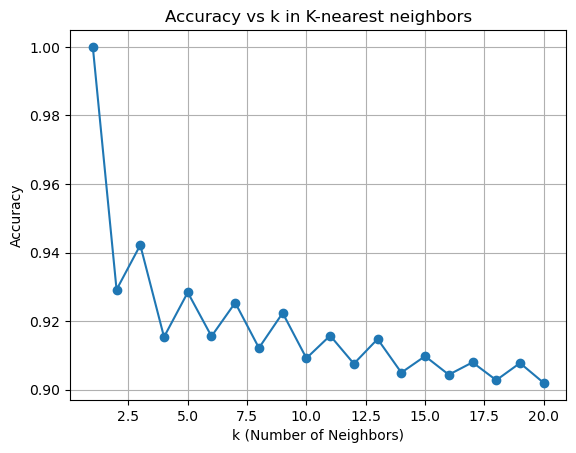

In [17]:
# Plot accuracy vs k
plt.plot(k_values, accuracy_list, marker='o')
plt.title('Accuracy vs k in K-nearest neighbors')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()